# MAT281 - Laboratorios N°07

<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

# 1 

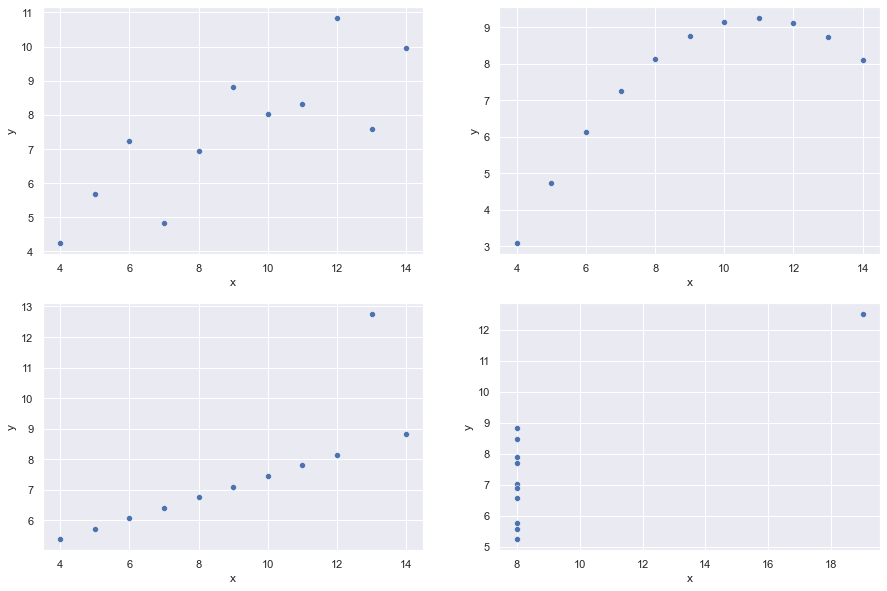

In [3]:
plt.figure(figsize=(15, 10))
sns.scatterplot(
    x='x',
    y='y',
    data=df[df['grupo'] == 'Grupo_1'],#selecciona los datos del grupo 1
    ax=plt.subplot(2,2,1)
)#gráfico tipo scatter grupo 1


sns.scatterplot(
    x='x',
    y='y',
    data=df[df['grupo'] == 'Grupo_2'],#selecciona los datos del grupo 2
    ax=plt.subplot(2,2,2)
)#gráfico tipo scatter grupo 2  

sns.scatterplot(
    x='x',
    y='y',
    data=df[df['grupo'] == 'Grupo_3'],#selecciona los datos del grupo 3
    ax=plt.subplot(2,2,3)
)#gráfico tipo scatter grupo 3   


sns.scatterplot(
    x='x',
    y='y',
    data=df[df['grupo'] == 'Grupo_4'],#selecciona los datos del grupo 4
    ax=plt.subplot(2,2,4)
)#gráfico tipo scatter grupo 4   

plt.show()

Loss gráficos son muy distintos entre si:

Gráfico Grupo 1: Tiene sus datos dispersos

Gráfico Grupo 2: Tiene la forma de una curva cuadrática.

Gráfico Grupo 3: Se asemeja a una curva lineal pero con un punto lejano.

Gráfico Grupo 4: Los datos estan pésimamente distribuidos pues se forma una linea vertical con un punto lejano.

# 2

In [4]:
df.groupby(['grupo']).describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
grupo                                                                     
Grupo_1  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
Grupo_2  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
Grupo_3  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
Grupo_4  11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
grupo                                              
Grupo_1  2.031568  4.26  6.315  7.58  8.57  10.84  
Grupo_2  2.031657  3.10  6.695  8.14  8.95   9.26  
Grupo_3  2.030424  5.39  6.250  7.11  7.98  12.74  
Grupo_4  2.030579  5.25  6.170  7.04  8.19  12.50

Podemos notar que para x los datos de los grupo 1,2,3 entregan la misma información con .describe() y lo del grupo 4 no se encuentra muy lejano.

Podemos notar que para y .describe() entrega valores bastante cercanos entre los grupos.

A pesar de lo anterior tenemos que los gráficos son completamente diferentes.

# 3

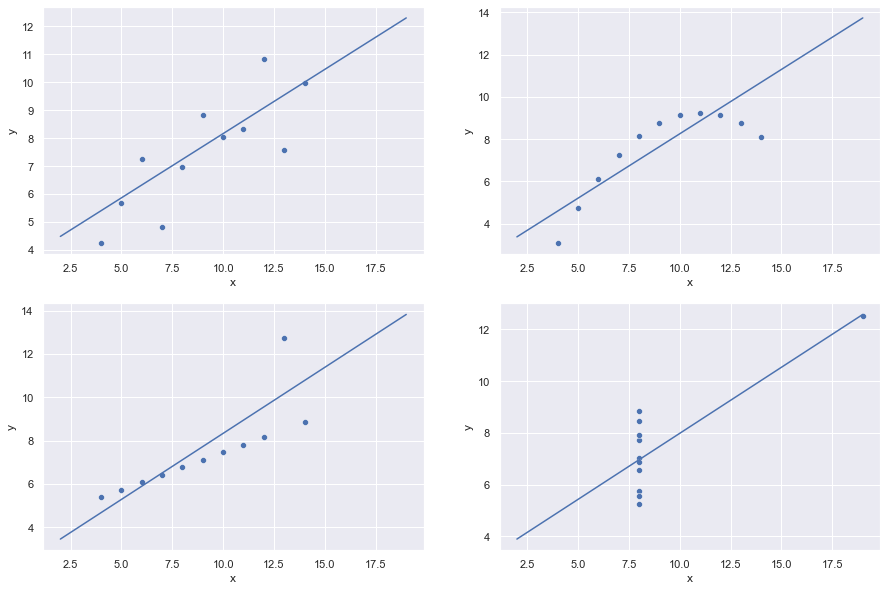

In [5]:
# importando el modelo regresión lineal

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_r = np.arange(2,20,1)

#Grupo 1
x1 = df[df['grupo'] == 'Grupo_1'][['x']]
y1 = df[df['grupo'] == 'Grupo_1']['y']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.33, random_state=42)
model_rl1 = LinearRegression().fit(x1_train, y1_train) # Crea el modelo y lo ajusta.

#betas a utilizar para hacer los datos que forman el ajuste
b_01 = round(model_rl1.intercept_,2)
b_11 = round(model_rl1.coef_[0],2)

y1_r = [b_01 + b_11*x for x in x_r]
df_g1 = pd.DataFrame({'x':x_r,
                      'y': y1_r})#datos que generaran el ajuste






#Grupo 2
x2 = df[df['grupo'] == 'Grupo_2'][['x']]
y2 = df[df['grupo'] == 'Grupo_2']['y']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.33, random_state=42)
model_rl2 = LinearRegression().fit(x2_train, y2_train) # Crea el modelo y lo ajusta.

#betas a utilizar para hacer los datos que forman el ajuste
b_02 = round(model_rl2.intercept_,2)
b_12 = round(model_rl2.coef_[0],2)

y2_r = [b_02 + b_12*x for x in x_r]
df_g2 = pd.DataFrame({'x':x_r,
                      'y': y2_r})#datos que generaran el ajuste





#Grupo 3
x3 = df[df['grupo'] == 'Grupo_3'][['x']]
y3 = df[df['grupo'] == 'Grupo_3']['y']

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.33, random_state=42)
model_rl3 = LinearRegression().fit(x3_train, y3_train) # Crea el modelo y lo ajusta.

#betas a utilizar para hacer los datos que forman el ajuste
b_03 = round(model_rl3.intercept_,2)
b_13 = round(model_rl3.coef_[0],2)

y3_r = [b_03 + b_13*x for x in x_r]
df_g3 = pd.DataFrame({'x':x_r,
                      'y': y3_r})#datos que generaran el ajuste





#Grupo 4
x4 = df[df['grupo'] == 'Grupo_4'][['x']]
y4 = df[df['grupo'] == 'Grupo_4']['y']

x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.33, random_state=42)
model_rl4 = LinearRegression().fit(x4_train, y4_train) # Crea el modelo y lo ajusta.

#betas a utilizar para hacer los datos que forman el ajuste
b_04 = round(model_rl4.intercept_,2)
b_14 = round(model_rl4.coef_[0],2)

y4_r = [b_04 + b_14*x for x in x_r]
df_g4 = pd.DataFrame({'x':x_r,
                      'y': y4_r})#datos que generaran el ajuste





plt.figure(figsize=(15, 10))
sns.scatterplot(
    x='x',
    y='y',
    data=df[df['grupo'] == 'Grupo_1'],#selecciona los datos del grupo 1
    ax=plt.subplot(2,2,1),
)#gráfico tipo scatter grupo 1
sns.lineplot(
    x='x',
    y='y',
    data=df_g1,
    ax=plt.subplot(2,2,1),
)#ajuste lineal grupo 1

sns.scatterplot(
    x='x',
    y='y',
    data=df[df['grupo'] == 'Grupo_2'],#selecciona los datos del grupo 2
    ax=plt.subplot(2,2,2),
)#gráfico tipo scatter grupo 2  
sns.lineplot(
    x='x',
    y='y',
    data=df_g2,
    ax=plt.subplot(2,2,2),
)#ajuste lineal grupo 2  

sns.scatterplot(
    x='x',
    y='y',
    data=df[df['grupo'] == 'Grupo_3'],#selecciona los datos del grupo 3
    ax=plt.subplot(2,2,3),
)#gráfico tipo scatter grupo 3   
sns.lineplot(
    x='x',
    y='y',
    data=df_g3,
    ax=plt.subplot(2,2,3),
)#ajuste lineal grupo 3  

sns.scatterplot(
    x='x',
    y='y',
    data=df[df['grupo'] == 'Grupo_4'],#selecciona los datos del grupo 4
    ax=plt.subplot(2,2,4),
)#gráfico tipo scatter grupo 4  
sns.lineplot(
    x='x',
    y='y',
    data=df_g4,
    ax=plt.subplot(2,2,4),
)#ajuste lineal grupo 4

plt.show()

Se observa claramente que no es de mucha utilidad la regresión lineal debido a las ubicaciones de los puntos en los gráficos, es necesario arreglarlos para obtener información util, excepto en el gráfico 3 donde es solo un dato el que causa que la regresión no pase sobre los puntos.

# 4

In [6]:
from metrics_regression import *
from sklearn.metrics import r2_score

In [7]:
#códigos obtenidos literales de las clases

# Grupo 1 
df_temp = pd.DataFrame(
    {
        'y':y1_test,
        'yhat': model_rl1.predict(x1_test)
        }
)

df1 = summary_metrics(df_temp)
df1['r2'] =  round(r2_score(y1_test, model_rl1.predict(x1_test)),4)


#Grupo 2

df_temp = pd.DataFrame(
    {
        'y':y2_test,
        'yhat': model_rl2.predict(x2_test)
        }
)

df2 = summary_metrics(df_temp)
df2['r2'] =  round(r2_score(y2_test, model_rl2.predict(x2_test)),4)


#Grupo 3

df_temp = pd.DataFrame(
    {
        'y':y3_test,
        'yhat': model_rl3.predict(x3_test)
        }
)

df3 = summary_metrics(df_temp)
df3['r2'] =  round(r2_score(y3_test, model_rl3.predict(x3_test)),4)


#Grupo 4

df_temp = pd.DataFrame(
    {
        'y':y4_test,
        'yhat': model_rl4.predict(x4_test)
        }
)

df4 = summary_metrics(df_temp)
df4['r2'] =  round(r2_score(y4_test, model_rl4.predict(x4_test)),4)

#Creación de la tabla
df_tabla = pd.concat([df1, df2, df3, df4])

grupos = pd.Series(['Grupo_1','Grupo_2','Grupo_3', 'Grupo_4']) 
df_tabla.set_index(keys=grupos)

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
Grupo_1,0.5907,0.9878,0.9939,0.1165,0.1113,0.0829,0.0971,0.0990,0.7572
Grupo_2,1.1934,2.0670,1.4377,0.1569,0.1541,0.1633,0.1381,0.1484,0.2186
Grupo_3,0.8342,1.1773,1.0850,0.1067,0.1057,0.1173,0.0943,0.1005,0.1432
Grupo_4,0.3700,0.2736,0.5230,0.0496,0.0495,0.0521,0.0437,0.0514,-0.1234


Basandonos en el r2 se tiene que para el grupo 1 la regresion lineal es más adecuada, pero esto solo se debe a que los datos a pesar de estar dispersos mantienen la forma de la linea dentro de un rango, y se tiene que el r2 del grupo 4 nos dice que esa es la peor de todas, lo cual obviamente sucede pues los puntos menos uno forman una linea recta.

# 5

Ideas de que hacer por gráfico:

Gráfico grupo 1: Debido a la distribución de los datos no es necesario hacer ningun arreglo, pues estos estan dispersos.

Gráfico grupo 2: Debido a la forma del gráfico seria más apropiado utilizar un ajuste cuadrático.

Gráfico grupo 3: Basta eliminar el outlier para que los datos queden bien distribuidos.

Gráfico grupo 4: En este no se puede hacer nada para arreglarlo debido a que los puntos estan ubicados en linea recta sin contar a uno, es decir, tienen una muy mala distribución, a lo más se puede eliminar el outlier pero eso no cambia mucho.

## Ejemplo corrección gráfico grupo 2

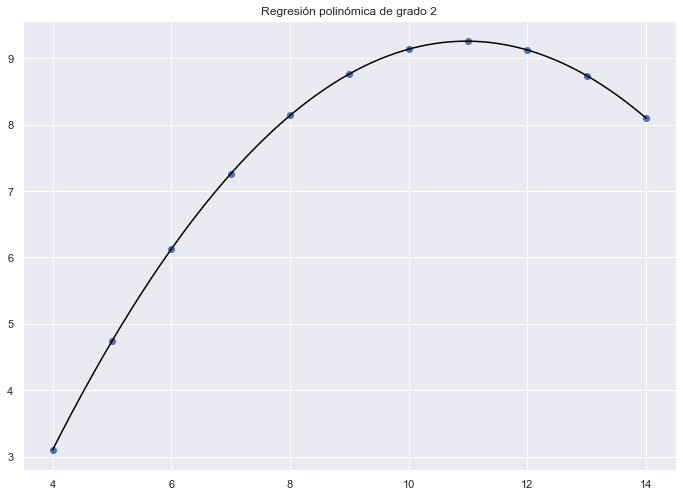

In [8]:
from sklearn.preprocessing import PolynomialFeatures#se importa para poder hacer el ajuste cuadrático
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression()).fit(x2_test,y2_test)#se hace el modelo y ajuste cuadrático

x_seq = np.linspace(x2.min(),x2.max(),300).reshape(-1,1)

plt.figure()
plt.scatter(x2,y2)#se genera el gráfico
plt.plot(x_seq,polyreg.predict(x_seq),color="black")#se agrega el ajuste cuadrático
plt.title("Regresión polinómica de grado "+str(degree))#se pone el titulo
plt.show()

## Ejemplo corrección gráfico grupo 3

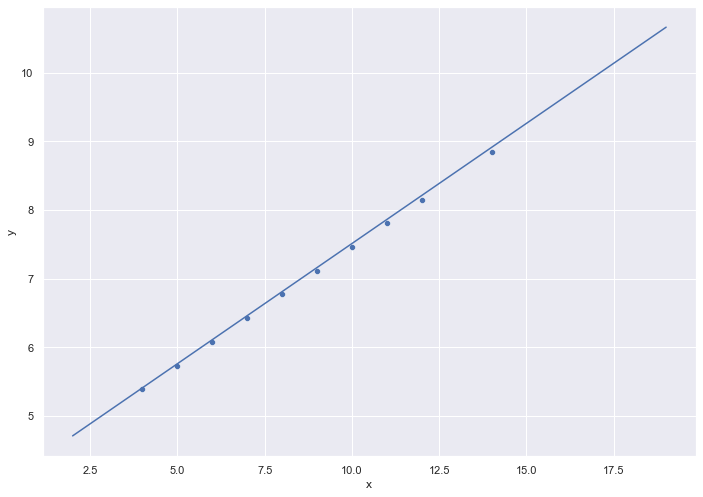

In [9]:
df_drop = df.drop(24)#elimina el outlier

x3 = df_drop[df_drop['grupo'] == 'Grupo_3'][['x']]
y3 = df_drop[df_drop['grupo'] == 'Grupo_3']['y']

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.33, random_state=42)
model_rl3 = LinearRegression().fit(x3_train, y3_train) # Crea el modelo y lo ajusta

#betas a utilizar para hacer los datos que forman el ajuste
b_03 = round(model_rl3.intercept_,2)
b_13 = round(model_rl3.coef_[0],2)

x_r = np.arange(2,20,1)
y3_r = [b_03 + b_13*x for x in x_r]
df_g3 = pd.DataFrame({'x':x_r,
                      'y': y3_r})#datos que generaran el ajuste

sns.scatterplot(
    x='x',
    y='y',
    data=df_drop[df_drop['grupo'] == 'Grupo_3']#selecciona los datos del grupo 3 del dataframe sin outlier
)
sns.lineplot(
    x='x',
    y='y',
    data=df_g3
)
plt.show()